In [1]:
# Sentiment Prediction using RNN / LSTM / GRU

In [2]:
# (a) Select a suitable time series dataset

from tensorflow.keras.datasets import imdb

2025-04-18 19:37:25.911391: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/rutulbhosale/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# Step 1: Load and Preprocess the Dataset

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset (Top 10,000 words only)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure equal length
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [ ]:
# Step 2: Build the LSTM/GRU Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),  
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=4, batch_size=128, validation_split=0.2)


In [7]:
# Step 3: Evaluate the Model

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8597 - loss: 0.3708
Test Accuracy: 0.8600


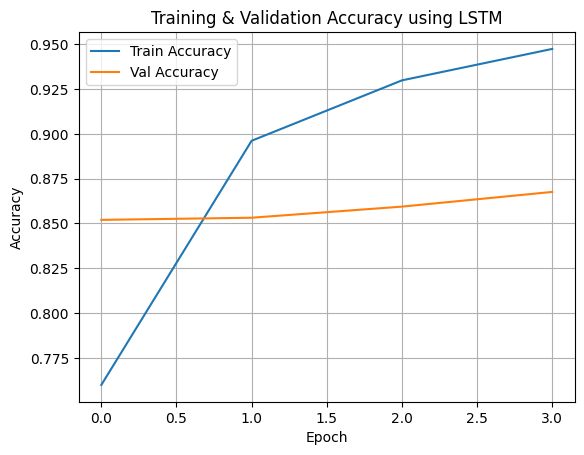

In [9]:
# Visualize Accuracy & Loss Curves

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy using LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
